In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [27]:
#Reading csv files

In [28]:
df=pd.read_csv(r"C:\Users\pebbl\Downloads\Crop_recommendation (1).csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label,manner_1,manner_2,manner_3
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
...,...,...,...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,NaN,177.774507,coffee,Coffee is typically propagated from coffee bea...,Coffee seeds are planted in nursery beds and l...,The timing of sowing coffee seeds depends on t...
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee,Coffee is typically propagated from coffee bea...,Coffee seeds are planted in nursery beds and l...,The timing of sowing coffee seeds depends on t...
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee,Coffee is typically propagated from coffee bea...,Coffee seeds are planted in nursery beds and l...,The timing of sowing coffee seeds depends on t...
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee,Coffee is typically propagated from coffee bea...,Coffee seeds are planted in nursery beds and l...,The timing of sowing coffee seeds depends on t...


In [29]:
df.groupby('label')['label'].agg('count')

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
Name: label, dtype: int64

In [30]:
#handling missing values

In [31]:
df.isnull().sum()

N               6
P               9
K               5
temperature     8
humidity       17
ph             14
rainfall        3
label           0
manner_1        0
manner_2        0
manner_3        0
dtype: int64

In [32]:
df1=df.dropna()

In [33]:
df1.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,50.087383,53.412150,48.515888,25.687148,71.828442,6.464127,102.738446
std,36.897662,33.370927,51.191107,5.076546,22.035593,0.772315,54.632428
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,27.000000,20.000000,22.845197,60.475143,5.969727,63.909274
50%,37.000000,51.000000,32.000000,25.665806,80.625750,6.425675,94.867624
75%,84.000000,68.000000,49.000000,28.614256,90.071487,6.919268,122.419611
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [34]:
df1

,N,P,K,temperature,humidity,ph,rainfall,label,manner_1,manner_2,manner_3
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,Rice is typically sown in flooded fields (padd...,Sowing depth and spacing depend on the rice va...,"Rice cultivation methods may vary, including d..."
...,...,...,...,...,...,...,...,...,...,...,...
2193,116.0,38.0,34.0,23.292503,50.045570,6.020947,183.468585,coffee,Coffee is typically propagated from coffee bea...,Coffee seeds are planted in nursery beds and l...,The timing of sowing coffee seeds depends on t...
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee,Coffee is typically propagated from coffee bea...,Coffee seeds are planted in nursery beds and l...,The timing of sowing coffee seeds depends on t...
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee,Coffee is typically propagated from coffee bea...,Coffee seeds are planted in nursery beds and l...,The timing of sowing coffee seeds depends on t...
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee,Coffee is typically propagated from coffee bea...,Coffee seeds are planted in nursery beds and l...,The timing of sowing coffee seeds depends on t...


In [36]:
from sklearn import preprocessing
LE= preprocessing.LabelEncoder()

labeled_value=LE.fit_transform(df1.label)
labeled_value

LE.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [37]:
classes=list(LE.classes_)
len(classes)

22

In [38]:
df1['label_encoded']=None
for i in range(0,len(df1)):
    for j in range(0,22):
        if (df1.iat[i,7]==classes[j]):
            df1.iat[i,11]=j

In [39]:
#Storing label encoder model

In [40]:
import pickle
with open("labelencoder.pickle",'wb') as f:
    pickle.dump(LE,f)

In [41]:
df2=df1.drop(['label','manner_1 ','manner_2 ','manner_3 '],axis='columns')

In [42]:
df2.to_csv('labelencoded.csv')
df2

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,20
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2193,116.0,38.0,34.0,23.292503,50.045570,6.020947,183.468585,5
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,5
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,5
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,5


In [43]:
X=df2.drop(['label_encoded'],axis='columns')
Y=df2.label_encoded.astype('int')

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [45]:
#Selecting appropriate alogorithm for better Result (K fold)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [47]:
import warnings
warnings.filterwarnings("ignore")

DT=cross_val_score(DecisionTreeClassifier(random_state=0, max_depth=7),x_train,y_train,cv=5)
KNN=cross_val_score(KNeighborsClassifier(n_neighbors=7),x_train,y_train,cv=5)
NB=cross_val_score(GaussianNB(),x_train,y_train,cv=5)
RF=cross_val_score(RandomForestClassifier(n_estimators = 100,random_state=0),x_train,y_train,cv=5)
Logi=cross_val_score(LogisticRegression(random_state=0),x_train,y_train,cv=5)

print(f"Decision Tree Classifier values at K is {DT} and mean is {round(DT.mean(),2)}")
print(f"KNN values at K is {KNN} and mean is {round(KNN.mean(),2)}")
print(f"Naive Bayes values at K is {NB} and mean is {round(NB.mean(),2)}")
print(f"Random Forest Classifier values at K is {RF} and mean is {round(RF.mean(),2)}")
print(f"Logistic Regression values at K is {Logi} and mean is {round(Logi.mean(),2)}")

Decision Tree Classifier values at K is [0.81341108 0.81341108 0.8245614  0.8128655  0.8245614 ] and mean is 0.82
KNN values at K is [0.97667638 0.97667638 0.97368421 0.97368421 0.97076023] and mean is 0.97
Naive Bayes values at K is [0.99708455 0.99125364 0.99122807 0.99707602 0.99122807] and mean is 0.99
Random Forest Classifier values at K is [1.         0.99125364 0.99122807 0.99707602 0.99415205] and mean is 0.99
Logistic Regression values at K is [0.96501458 0.95626822 0.93859649 0.9619883  0.95906433] and mean is 0.96


In [48]:
#Random Forest outperforms However, hyperparameter tuning may improve accuracy. ( GridSearchCV)

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = { "n_estimators" : [i for i in range(1,201)]}
grid = GridSearchCV(RandomForestClassifier(),param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

print(grid.best_score_ , grid.best_params_)

Estimator= grid.best_params_.get("n_estimators")

print(Estimator)

0.9970794332770703 {'n_estimators': 41}
41


In [50]:
#Got the Hyperparameter value for optimal results. We are able to construct models.

In [51]:
model=RandomForestClassifier(n_estimators=Estimator)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9976635514018691

In [52]:
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
cp=classification_report(y_test,y_pred)
print(cp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        22
           2       1.00      0.94      0.97        17
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        21
          11       0.93      1.00      0.97        14
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        17
          17       1.00    

In [53]:
#Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

<Axes: >

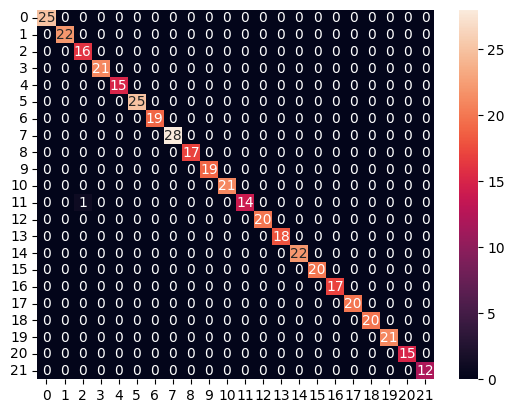

In [55]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [56]:
#Storing model in pickle file

In [57]:
import pickle 
with open('Crop_recommendation.pickle','wb') as f:
    pickle.dump(model,f)

In [58]:
p=model.predict([[90,25,36,25,80,6,203]])

In [59]:
p[0]

20

In [62]:
v=LE.inverse_transform([p[0]])
v[0]


'rice'

In [70]:
predicted_label = v[0]  

matching_row = df[df['label'] == predicted_label]

if not matching_row.empty:
    manner_1_value = matching_row['manner_1 '].values[0]
    manner_2_value = matching_row['manner_2 '].values[0]
    manner_3_value = matching_row['manner_3 '].values[0]

    print(f"Predicted Crop : {predicted_label}")
    print(f"Right Manner: \n-{manner_1_value}")
    print(f"-{manner_2_value}")
    print(f"-{manner_3_value}")
else:
    print(f"No matching row found for predicted label: {predicted_label}")


Predicted Crop : rice
Right Manner: 
-Rice is typically sown in flooded fields (paddy fields) during the rainy season
-Sowing depth and spacing depend on the rice variety and local conditions.
-Rice cultivation methods may vary, including direct seeding or transplanting.
